In [66]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import dataset_exploration.analyze_stuff as analyze
from vizer.draw import draw_boxes
from tops.config import instantiate, LazyConfig
from ssd import utils
#import configs.retinaNet_focal_loss as config
np.random.seed(0)

In [3]:

basepath = '/work/alexaram/project_tdt4265/assignment4/SSD/data/tdt4265_2022/train_annotations.json'
df = pd.read_json(basepath,lines = True)
#print(df.to_string()) 

2022-04-30 13:23:01,135 [INFO ] NumExpr defaulting to 8 threads.


Saving SSD outputs to: outputs/
classes ocourens :  
 1    9563
7    4910
8    1588
5    1043
6     615
3     445
2     123
Name: category_id, dtype: int64


<bound method NDFrame.head of                                                     bbox       area  \
0      [725.93, 63.64, 20.40000000000009, 13.73999999...   280.2960   
1      [351.26, 81.08, 7.939999999999998, 31.32000000...   248.6808   
2               [187.57, 81.25, 7.27000000000001, 23.61]   171.6447   
3      [431.3, 87.54, 7.279999999999973, 19.839999999...   144.4352   
4                              [107.8, 78.1, 37.3, 39.0]  1454.7000   
...                                                  ...        ...   
18282  [523.03, 72.26, 16.06000000000006, 13.50999999...   216.9706   
18283         [461.68, 63.35, 4.5400000000000205, 11.46]    52.0284   
18284           [710.64, 82.7, 13.289999999999964, 45.3]   602.0370   
18285  [527.9, 72.7, 16.06000000000006, 13.5099999999...   216.9706   
18286  [466.72, 63.83, 4.5499999999999545, 11.7600000...    53.5080   

       category_id  image_id     id segmentation  iscrowd  
0                1         1      1           []        0

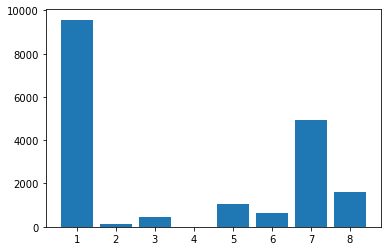

In [67]:
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)
occourence_classes = df['category_id'].value_counts()
print('classes ocourens : ','\n' ,occourence_classes)
number_of_images = len(df)
plt.bar(occourence_classes.index,occourence_classes.values)


df.head

In [91]:
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)

df_cars = df.loc[df['category_id']==1]
q = 0
hight = []
width = []
x = []
y = []
for i in range(len(df_cars)):
     list = df_cars['bbox'].values[i]
     x.append(list[0])
     y.append(list[1])
     hight.append(list[2])
     width.append(list[3])
     q += 1
dict = {'x':x,'y':y,'h':hight,'w':width}
df_bbox = pd.DataFrame(dict)    
df_bbox['h'].mean()
# print(hight/q)    
# print('aaaaaaaaaaaaaaaaaaaaaaaaa: ', q)
# print(bbox_cars)
# print('len is equal to: ', number_of_images)
# average_area_cars = (cars['area']).mad()
# print('mean area: ',average_area_cars)
# print(cars)

# df1 = (cars['bbox[3]']).mean()

Saving SSD outputs to: outputs/


28.405051761999374

In [99]:
BATCH_SIZE = 1
SET_TYPE = 'train'
CFG_PATH = 'configs/retinaNet_focal_loss.py'

cfg = analyze.get_config(CFG_PATH)
#print(cfg)
metadata = analyze.load_annotation_file(cfg, SET_TYPE)
#number of times a value appears = (df['image_id']==1).sum()
# occourence_classes = df['category_id'].value_counts()
annotations = metadata['annotations']
df = pd.DataFrame(data=annotations)

df_class = df.loc[df['category_id']==1]
hight = []
width = []
x = []
y = []
# list = df_cars['bbox'].values[:]

for i in range(len(df_class)):
    list = df_class['bbox'].values[i]
    x.append(list[0])
    y.append(list[1])
    hight.append(list[2])
    width.append(list[3])
dict = {'x':x,'y':y,'h':hight,'w':width}
df_bbox = pd.DataFrame(dict)    
df_bbox['h'].median()


Saving SSD outputs to: outputs/


19.66999999999996